In [2]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import os
#Import ordered dict package
from collections import OrderedDict

#np.set_printoptions(suppress=True)

#Read data from csv
churn_data = pd.read_csv(os.path.expanduser('telecom_churn_data.csv'))
#churn_data = pd.read_csv('C:/Users/vchitma/Desktop/PCA-TelecomChurn/telecom_churn_data.csv', sep=',', encoding='ISO-8859-1')
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [3]:
#Get columns in the dataframe
churn_data.columns.values

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [4]:
#Rename Columns to align which are given as jun,jul,aug ,sep to 6,7,8,9 to align to rest of the columns given month wise
churn_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [5]:
#Get the null % of all the columns
print('\n Null % \n',round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2))


 Null % 
 mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85

In [6]:
#Dropping columns with null values
churn_data=churn_data.dropna(axis=1,how='all')

In [7]:
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6    ...     sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385    ...               0        1.0        1.0   
1            9/30/2014   34.047    ...               0        NaN        1.0   
2            9/30/2014  167.690    ...               0        NaN        NaN   
3            9/30/2014  221.338    ...               0        NaN        NaN   
4            9/30/2014  261.636    ...               0        0.0        NaN   

   fb_user_8  fb_user_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
0        1.0        NaN   968      30.4       0.0    101.20      3.58  
1        1.0        NaN  1006       0.0       0.0      0.00      0.00  
2        NaN        1.0  1103       0.0       0.0      4.17      0.00  
3        NaN        NaN  2491       0.0       0.0      0.00      0.00  
4        NaN        NaN  1526       0.0       0.0      0.00      0.00  

[5 rows x 226 columns]

In [8]:
zero_cols = [ col for col, is_zero in ((churn_data == 0).sum() == churn_data.shape[0]).items() if is_zero ]
churn_data.drop(zero_cols, axis=1, inplace=True)

In [9]:
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6    ...     sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385    ...               0        1.0        1.0   
1            9/30/2014   34.047    ...               0        NaN        1.0   
2            9/30/2014  167.690    ...               0        NaN        NaN   
3            9/30/2014  221.338    ...               0        NaN        NaN   
4            9/30/2014  261.636    ...               0        0.0        NaN   

   fb_user_8  fb_user_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  
0        1.0        NaN   968      30.4       0.0    101.20      3.58  
1        1.0        NaN  1006       0.0       0.0      0.00      0.00  
2        NaN        1.0  1103       0.0       0.0      4.17      0.00  
3        NaN        NaN  2491       0.0       0.0      0.00      0.00  
4        NaN        NaN  1526       0.0       0.0      0.00      0.00  

[5 rows x 226 columns]

In [10]:
churn_data[['av_rech_amt_data_6','av_rech_amt_data_7']].head(10)

av_rech_amt_data_6  av_rech_amt_data_7
0               252.0               252.0
1                 NaN               154.0
2                 NaN                 NaN
3                 NaN                 NaN
4                56.0                 NaN
5                 NaN                 NaN
6                 NaN                 NaN
7                 NaN                 NaN
8                 NaN               177.0
9                 NaN               154.0

In [11]:
churn_data[['total_rech_data_6','total_rech_data_7']].head(10)

total_rech_data_6  total_rech_data_7
0                1.0                1.0
1                NaN                1.0
2                NaN                NaN
3                NaN                NaN
4                1.0                NaN
5                NaN                NaN
6                NaN                NaN
7                NaN                NaN
8                NaN                2.0
9                NaN                1.0

In [12]:
#Fill missing values to filter high value customers
churn_data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']]=churn_data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']].fillna(0, axis=1)

In [13]:
#Get the top 30% customers based on the sum of recharges in month 6 and 7
high_value_cust=churn_data[churn_data[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)> churn_data[['total_rech_amt_6', 'total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1).quantile(0.7)]

In [14]:
#Understand the no of datapoints, column and column types
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: float64(179), int64(35), object(12)
memory usage: 51.9+ MB


In [15]:
#Get the string columns in the data frame
str_cols = high_value_cust.select_dtypes(['object'])
#Strip the leading and trailing whitespaces
high_value_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.strip())

In [16]:
#Convert all the string columns to upper case
high_value_cust[str_cols.columns] = str_cols.apply(lambda x: x.str.upper())

In [17]:
#Get no of unique mobile numbers, this is an id column
len(high_value_cust['mobile_number'].unique())

29949

In [18]:
#set the option to display maximum of 250 rows
pd.set_option("display.max_rows",250)

In [19]:
#Get null% of all columns
round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.52
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc_og_t2t_mou

In [20]:
#Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9' should be 0
high_value_cust['churn']=high_value_cust[['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']].apply(lambda x: 1 if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)) else 0, axis=1)

In [21]:
 #Get only the data where the customers churned
churned_total = high_value_cust[high_value_cust['churn']==1]
len(churned_total)

2451

In [22]:
#No of non churned customers
len(high_value_cust[high_value_cust['churn']==0])

27498

In [23]:
#Get the null % of columns where the customers churned
print('\n Null % \n',round(100*(churned_total.isnull().sum()/len(churned_total.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               3.75
std_og_t2o_mou               3.75
loc_ic_t2o_mou               3.75
last_date_of_month_6         0.00
last_date_of_month_7         1.14
last_date_of_month_8         6.32
last_date_of_month_9        14.48
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  6.16
onnet_mou_7                  8.04
onnet_mou_8                 30.52
onnet_mou_9                 64.46
offnet_mou_6                 6.16
offnet_mou_7                 8.04
offnet_mou_8                30.52
offnet_mou_9                64.46
roam_ic_mou_6                6.16
roam_ic_mou_7                8.04
roam_ic_mou_8               30.52
roam_ic_mou_9               64.46
roam_og_mou_6                6.16
roam_og_mou_7                8.04
roam_og_mou_8               30.52
roam_og_mou_9               64.46
loc

In [24]:
high_value_cust.drop(['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9'], axis=1, inplace=True)

#The last date of month columns will be having same value and hence can be dropped

In [25]:
high_value_cust.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [26]:
#Recheck the null percentage
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc_og_t2t_mou_6             1.65
loc_og_t2t_mou_7             1.62
loc_og_t2t_mou_8             3.63
loc

In [27]:
#Convert the date columns from string to date type
dateColumns = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
high_value_cust[dateColumns]=high_value_cust[dateColumns].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y', errors='coerce'))
high_value_cust[dateColumns]

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0              2014-06-21          2014-07-16          2014-08-08   
7              2014-06-27          2014-07-25          2014-08-26   
8              2014-06-25          2014-07-31          2014-08-30   
16             2014-06-30          2014-07-31          2014-08-14   
21             2014-06-30          2014-07-31          2014-08-31   
33             2014-06-30          2014-07-30          2014-08-26   
38             2014-06-30          2014-07-28          2014-08-24   
41             2014-06-24          2014-07-22          2014-08-31   
48             2014-06-29          2014-07-23          2014-08-28   
53             2014-06-29          2014-07-31          2014-08-26   
56             2014-06-28          2014-07-30          2014-08-31   
57             2014-06-29          2014-07-26          2014-08-24   
60             2014-06-26          2014-07-28          2014-08-27   
61             2014-06-28          2014-07-29          2014-08-23   
67             2014-06-25          2014-07-16          2014-08-02   
69             2014-06-30          2014-07-28          2014-08-31   
73             2014-06-30          2014-07-31          2014-08-31   
77             2014-06-17          2014-07-27          2014-08-27   
87             2014-06-28          2014-07-29          2014-08-31   
92             2014-06-29          2014-07-29          2014-08-21   
96             2014-06-30          2014-07-28          2014-08-29   
101            2014-06-25          2014-07-29          2014-08-30   
102            2014-06-20          2014-07-28          2014-08-26   
103            2014-06-30          2014-07-30          2014-08-25   
105            2014-06-22          2014-07-31          2014-08-24   
111            2014-06-13          2014-07-27          2014-08-24   
115            2014-06-25          2014-07-25          2014-08-29   
122            2014-06-30          2014-07-27          2014-08-14   
124            2014-06-30          2014-07-31          2014-08-30   
131            2014-06-28          2014-07-31          2014-08-28   
133            2014-06-26          2014-07-31          2014-08-28   
134            2014-06-16          2014-07-25          2014-08-17   
146            2014-06-21          2014-07-30          2014-08-30   
147            2014-06-20          2014-07-29          2014-08-26   
149            2014-06-27          2014-07-19          2014-08-31   
154            2014-06-21          2014-07-20          2014-08-25   
157            2014-06-30          2014-07-26          2014-08-27   
158            2014-06-22          2014-07-31          2014-08-29   
170            2014-06-30          2014-07-28          2014-08-27   
171            2014-06-29          2014-07-31          2014-08-30   
173            2014-06-29          2014-07-30          2014-08-31   
175            2014-06-29          2014-07-28          2014-08-29   
176            2014-06-29          2014-07-31          2014-08-30   
177            2014-06-28          2014-07-29          2014-08-22   
184            2014-06-29          2014-07-30          2014-08-31   
185            2014-06-28          2014-07-31          2014-08-19   
188            2014-06-28          2014-07-07                 NaT   
191            2014-06-12          2014-07-30                 NaT   
195            2014-06-25          2014-07-24          2014-08-26   
199            2014-06-30          2014-07-27          2014-08-25   
204            2014-06-27          2014-07-24          2014-08-28   
206            2014-06-30          2014-07-26          2014-08-30   
208            2014-06-28          2014-07-29          2014-08-28   
213            2014-06-27          2014-07-31          2014-08-31   
218            2014-06-29          2014-07-30          2014-08-31   
225            2014-06-29          2014-07-28          2014-08-31   
226            2014-06-26          2014-07-30          2014-08-31   
235 

In [28]:
#Transform the existing date of last recharge columns with 1 indicating a recharge and 0 indicating no recharge
dateColumnsToTransform = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[dateColumnsToTransform].applymap(lambda x: 0 if pd.isnull(x) else 1)


In [29]:
#Convert the features to category
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]] = high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8']].apply(lambda x: x.astype('category'))

In [30]:
#Lets look at the columns we created
high_value_cust[['rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8' ]]

rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6 rech_data_7 rech_data_8
0              1          1          1           1           1           1
7              1          1          1           0           0           0
8              1          1          1           0           1           1
16             1          1          1           0           0           0
21             1          1          1           0           0           0
33             1          1          1           1           1           1
38             1          1          1           0           0           0
41             1          1          1           0           0           0
48             1          1          1           0           0           0
53             1          1          1           1           1           1
56             1          1          1           1           1           1
57             1          1          1           1           1           1
60             1          1          1           0           0           0
61             1          1          1           1           1           1
67             1          1          1           1           1           0
69             1          1          1           0           0           0
73             1          1          1           0           1           0
77             1          1          1           0           1           0
87             1          1          1           0           1           1
92             1          1          1           1           1           1
96             1          1          1           0           0           0
101            1          1          1           1           1           1
102            1          1          1           1           1           1
103            1          1          1           0           0           0
105            1          1          1           1           1           1
111            1          1          1           1           0           0
115            1          1          1           1           0           1
122            1          1          1           0           0           0
124            1          1          1           1           1           0
131            1          1          1           0           0           0
133            1          1          1           1           1           1
134            1          1          1           1           1           1
146            1          1          1           0           1           0
147            1          1          1           1           1           1
149            1          1          1           1           1           1
154            1          1          1           0           0           0
157            1          1          1           1           0           1
158            1          1          1           0           1           1
170            1          1          1           1           1           1
171            1          1          1           1           1           1
173            1          1          1           0           1           1
175            1          1          1           0           0           0
176            1          1          1           1           1           1
177            1          1          1           1           1           1
184            1          1          1           0           1           0
185            1          1          1           1           1           1
188            1          1          0           1           0           0
191            1          1          0           1           1           0
195            1          1          1           0           0           0
199            1          1          1           0           0           0
204            1          1          1           1           1           1
206            1          1          1           1           1           1
208            1          1    

In [31]:
high_value_cust.drop(dateColumnsToTransform, axis=1, inplace=True)

In [32]:
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 220 entries, mobile_number to rech_data_8
dtypes: category(6), float64(175), int64(36), object(3)
memory usage: 49.3+ MB


In [33]:
print('\n Null % \n',round(100*(high_value_cust.isnull().sum()/len(high_value_cust.index)), 2))


 Null % 
 mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_9         1.19
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.65
onnet_mou_7                  1.62
onnet_mou_8                  3.63
onnet_mou_9                  6.06
offnet_mou_6                 1.65
offnet_mou_7                 1.62
offnet_mou_8                 3.63
offnet_mou_9                 6.06
roam_ic_mou_6                1.65
roam_ic_mou_7                1.62
roam_ic_mou_8                3.63
roam_ic_mou_9                6.06
roam_og_mou_6                1.65
roam_og_mou_7                1.62
roam_og_mou_8                3.63
roam_og_mou_9                6.06
loc_og_t2t_mou_6             1.65
loc_og_t2t_mou_7             1.62
loc_og_t2t_mou_8             3.63
loc

In [34]:
#Get all the null columns
null_cols=high_value_cust.columns[high_value_cust.isna().any()].tolist()
null_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_o

In [35]:
#Impute the missing values and convert the features to category
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]]=high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].applymap(lambda x: 0 if pd.isnull(x) else 1)
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]] = high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].apply(lambda x: x.astype('category'))

In [36]:
high_value_cust[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                 0                0                0         0         0   
8                 0                1                1         0         1   
16                0                0                0         0         0   
21                0                0                0         0         0   

   fb_user_8  
0          1  
7          0  
8          1  
16         0  
21         0

In [37]:
#Lets check if any of the rows having all data or call columns with null values 
high_value_cust.drop(['mobile_number','circle_id',
                     'last_date_of_month_9','rech_amt_6','rech_amt_7','rech_amt_8','rech_data_6','rech_data_7','rech_data_8'], axis=1).isna().all()

loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
arpu_6                      False
arpu_7                      False
arpu_8                      False
arpu_9                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
onnet_mou_9                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
offnet_mou_9                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_ic_mou_9               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
roam_og_mou_9               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2t_mou_9            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou

In [38]:
#Exclude the date and category columns from the dataset and impute with 0
high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = high_value_cust[high_value_cust.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [39]:
#Get all the columns ending with 9. All the columns of month 9
month_9_cols = [col for col in high_value_cust.columns if '9' in col]
month_9_cols

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [40]:
#Remove the month 9 columns since they are not necessary for prediction
high_value_cust = high_value_cust.drop(month_9_cols, axis=1)

In [41]:
#Get first few rows in the dataframe
high_value_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7     ...       \
0    197.385   214.816   213.803         0.00         0.00     ...        
7   1069.180  1349.850  3171.480        57.84        54.68     ...        
8    378.721   492.223   137.362       413.69       351.03     ...        
16   430.975   299.869   187.894        50.51        74.01     ...        
21   514.453   597.753   637.760       102.41       132.11     ...        

    vbc_3g_8  vbc_3g_7  vbc_3g_6  churn  rech_amt_6  rech_amt_7  rech_amt_8  \
0      30.40      0.00    101.20      1           1           1           1   
7      57.74     19.38     18.74      1           1           1           1   
8      21.03    910.65    122.16      0           1           1           1   
16      0.00      2.45     21.89      0           1           1           1   
21      0.00      0.00      0.00      0           1           1           1   

    rech_data_6  rech_data_7  rech_data_8  
0             1            1            1  
7             0            0            0  
8             0            1            1  
16            0            0            0  
21            0            0            0  

[5 rows x 169 columns]

In [42]:
#Drop the columns
high_value_cust = high_value_cust.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                     'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6',
                     'std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1)

In [43]:
#Get the info of the dataframe after dropiing columns
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 99998
Columns: 158 entries, arpu_6 to rech_data_8
dtypes: category(12), float64(120), int64(26)
memory usage: 33.9 MB


In [44]:
#Create a new dataframe
total_data = pd.DataFrame()

In [45]:
#Get columns excluding date columns
cols = high_value_cust.select_dtypes(exclude=['datetime64[ns]','object','category']).columns.tolist()

In [46]:
#Remove aon and churn columns
cols.remove('aon')
cols.remove('churn')

In [47]:
#Create an empty list
sublist=[]

#Get the columns names removing last two characters
for col in cols:
    sublist.append(col[:-2])

In [48]:
#Import ordered dict package
from collections import OrderedDict

#Get unique column names after removing last two characters into a list
collist=[]
collist=list(OrderedDict.fromkeys(sublist))
collist

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g']

In [49]:
#Loop through all the unique features, append 6,7,8 and add the totals to the new dataframe
for col in collist:
    total_data['total_'+col] = high_value_cust[col+'_6']+high_value_cust[col+'_7']+high_value_cust[col+'_8']

In [50]:
#Add back churn and aon columns to new dataframe
total_data['aon'] = high_value_cust['aon']
total_data['churn'] = high_value_cust['churn']

In [51]:
#Get first few rows of new dataframe
total_data.head()

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
0      626.004             0.00              0.00               0.00   
7     5590.510           164.81           1346.50              81.36   
8     1008.306           799.80            311.77               0.00   
16     918.738           195.13            688.79               2.83   
21    1749.966           319.66           2638.00               0.00   

    total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
0                0.00                  0.00                  0.00   
7               74.39                123.05                918.29   
8                0.00                527.21                202.08   
16              17.74                175.15                547.56   
21               0.00                 33.98                284.55   

    total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
0                   0.00                  0.00              0.00  ...     
7                 170.50                  0.00           1211.86  ...     
8                   0.00                  7.15            729.31  ...     
16                 14.74                  0.00            737.48  ...     
21                  2.33                  0.00            320.87  ...     

    total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
0            343.94         636.51         636.51                 0   
7              0.00           0.00           0.00                 0   
8            762.89          19.83           0.00                 1   
16             0.00           0.00           0.00                 0   
21             0.00           0.00           0.00                 0   

    total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
0                 0                 3                0        131.60  968   
7                 0                 0                0         95.86  802   
8                 4                 0                0       1053.84  315   
16                0                 0                0         24.34  511   
21                0                 0                0          0.00  720   

    churn  
0       1  
7       1  
8       0  
16      0  
21      0  

[5 rows x 50 columns]

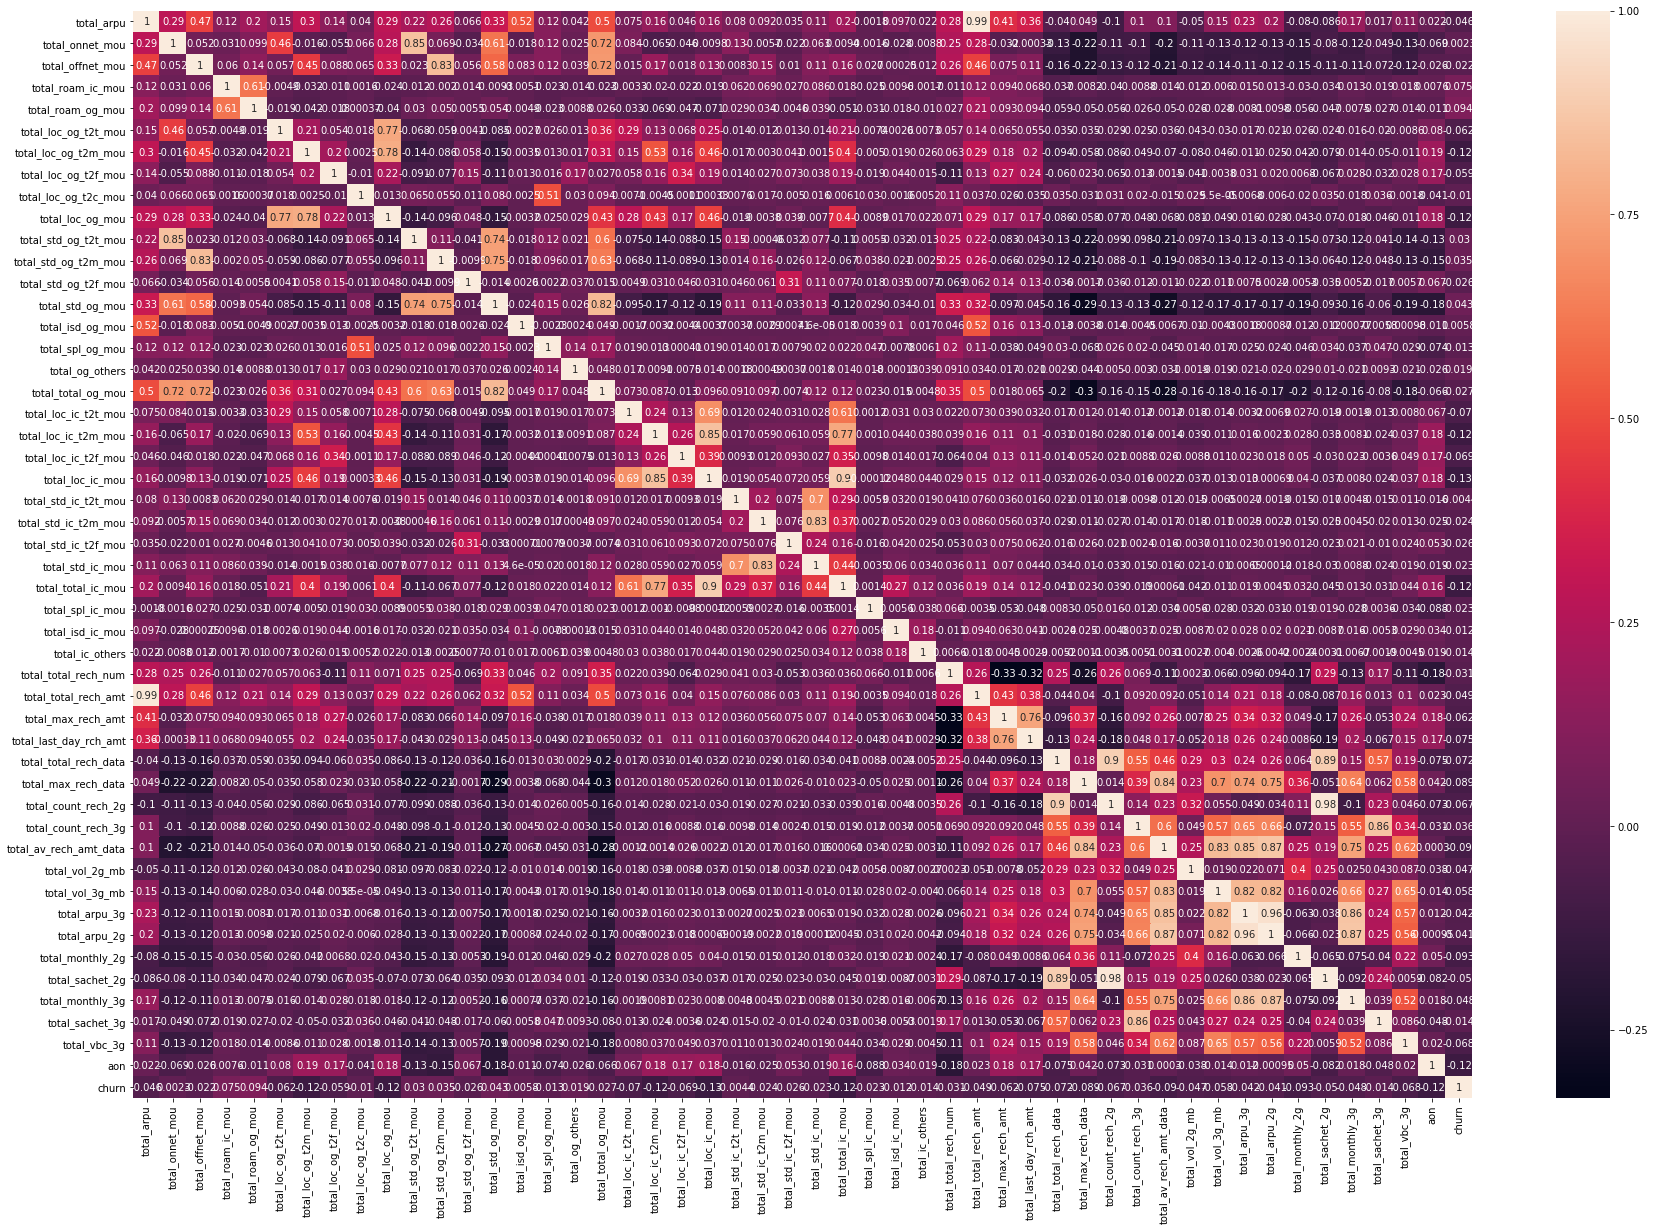

In [52]:
#Lets plot the correlation matrix of new dataframe

#%matplotlib inline
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(total_data.corr(),annot = True)

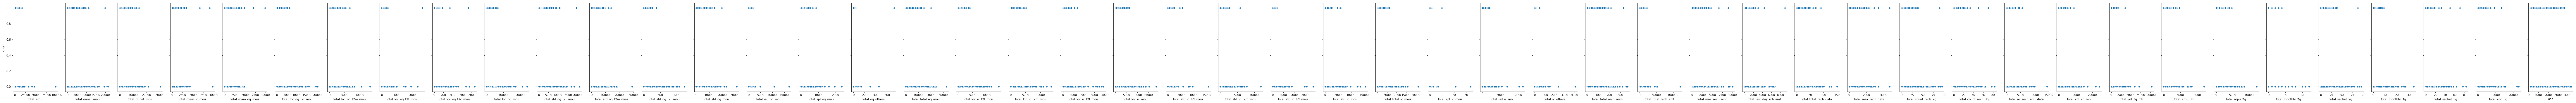

In [52]:
#Pair plot of all the columns with respect to churn
sns.pairplot(total_data, x_vars=total_data.drop('churn', axis=1).columns, y_vars='churn', size=5, aspect=0.5,kind='scatter')

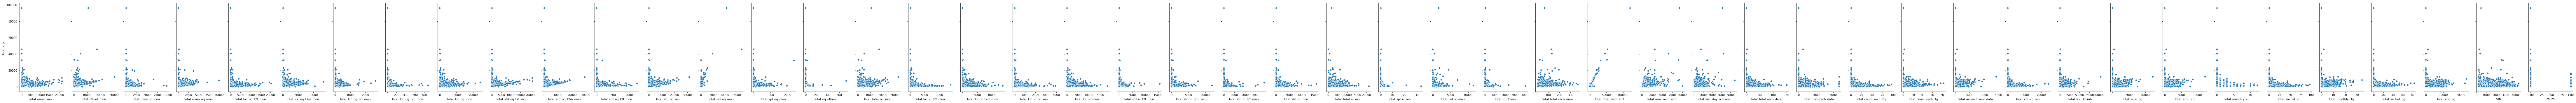

In [53]:
sns.pairplot(total_data, x_vars=total_data.drop('total_arpu', axis=1).columns, y_vars='total_arpu', size=5, aspect=0.5,kind='scatter')

In [54]:
#Outliers in total_arpu
total_data[total_data['total_arpu']>40000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
38610   96420.546            17.84          10725.83                0.0   
51314   46152.276             0.18          17232.18                1.0   
67717   40614.779            37.53           4913.58                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
38610               0.00                 17.84                 11.20   
51314             139.98                  0.18                  0.00   
67717               0.00                 37.53                 43.21   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
38610                  0.00                  0.00             29.06  ...     
51314                  0.60                  9.68              0.78  ...     
67717                  3.35                  0.15             84.11  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
38610             0.00           0.00           0.00                 0   
51314           833.73         424.34         424.34                 0   
67717             0.00           0.00           0.00                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
38610                0                 0                0          0.00  460   
51314                0                 2                0       1094.61  289   
67717                0                 0                0          0.00  374   

       churn  
38610      0  
51314      0  
67717      0  

[3 rows x 50 columns]

In [55]:
#Outliers in total_offnet_mou
total_data[total_data['total_offnet_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
33035                  4.93                 23.53            453.48  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
33035              0.0            0.0            0.0                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
33035                1                 0                0           0.0  423   

       churn  
33035      0  

[1 rows x 50 columns]

In [56]:
#Outliers in total_roam_ic
total_data[total_data['total_roam_ic_mou']>9500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
28436    1238.586           366.65            887.01             9716.2   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
28436            1099.49                 83.73                 61.58   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
28436                   0.0                  0.58            145.33  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
28436          1217.47         497.88         488.28                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
28436                0                 4                0        362.96  383   

       churn  
28436      0  

[1 rows x 50 columns]

In [57]:
#Outliers in total_roam_og_mou
total_data[total_data['total_roam_og_mou']>7500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
74987      8101.6          8394.67           1502.15              27.66   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
74987            9896.82                   0.0                   0.0   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
74987                   0.0                   0.0               0.0  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
74987              0.0            0.0            0.0                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
74987                0                 0                0           0.0  300   

       churn  
74987      1  

[1 rows x 50 columns]

In [58]:
#Outliers in total_loc_og_t2f_mou
total_data[total_data['total_loc_og_t2f_mou']>2000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
67497    4478.437            29.61           2675.15               0.00   
95046    7318.820           395.73           5203.92              92.46   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
67497                0.0                 29.61                312.41   
95046             1625.7                 40.10                  4.85   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
67497               2357.03                  5.68           2699.10  ...     
95046               2673.84                  0.00           2718.81  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
67497              0.0            0.0            0.0                 0   
95046              0.0            0.0            0.0                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
67497                0                 0                0          0.00  838   
95046                0                 0                0        151.52  262   

       churn  
67497      0  
95046      1  

[2 rows x 50 columns]

In [59]:
#Outliers in total_std_og_t2m_mou
total_data[total_data['total_std_og_t2m_mou']>20000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
33035                  4.93                 23.53            453.48  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
33035              0.0            0.0            0.0                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
33035                1                 0                0           0.0  423   

       churn  
33035      0  

[1 rows x 50 columns]

In [60]:
#Outliers in total_std_og_mou
total_data[total_data['total_std_og_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
33035                  4.93                 23.53            453.48  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
33035              0.0            0.0            0.0                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
33035                1                 0                0           0.0  423   

       churn  
33035      0  

[1 rows x 50 columns]

In [61]:
#Outliers in total_isd_og_mou
total_data[total_data['total_isd_og_mou']>15000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
51314   46152.276             0.18          17232.18                1.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
51314             139.98                  0.18                   0.0   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
51314                   0.6                  9.68              0.78  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
51314           833.73         424.34         424.34                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
51314                0                 2                0       1094.61  289   

       churn  
51314      0  

[1 rows x 50 columns]

In [62]:
#Outliers in total_total_og_mou
total_data[total_data['total_total_og_mou']>30000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
33035    12124.74          2351.28          30177.43                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
33035                0.0                 96.07                352.46   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
33035                  4.93                 23.53            453.48  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
33035              0.0            0.0            0.0                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
33035                1                 0                0           0.0  423   

       churn  
33035      0  

[1 rows x 50 columns]

In [63]:
#Outliers in total_loc_ic_t2t_mou
total_data[total_data['total_loc_ic_t2t_mou']>12000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
34952    2785.079          1438.76           1142.54                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
34952                0.0               1201.29                536.78   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
34952                  36.3                 35.29            1774.4  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
34952             1.66            0.0            7.4                 1   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
34952                0                 0                0          1.89  605   

       churn  
34952      0  

[1 rows x 50 columns]

In [65]:
#Outliers in total_std_ic_t2m_mou
total_data[total_data['total_std_ic_t2m_mou']>10000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
12898    2019.799           421.58           3518.78              24.13   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
12898              16.85                 24.83                233.33   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
12898                   0.0                 39.01            258.18  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
12898              0.0            0.0           5.15                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
12898                2                 0                0           0.0  221   

       churn  
12898      0  

[1 rows x 50 columns]

In [66]:
#Outliers in total_isd_ic_mou
total_data[total_data['total_isd_ic_mou']>7500]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
71514    1758.512           278.68            612.53                0.0   
83599    3386.160           111.60            578.20                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
71514                0.0                222.19                210.52   
83599                0.0                111.27                392.88   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
71514                 21.66                  0.00            454.41  ...     
83599                138.38                 13.34            642.56  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
71514          2228.54         454.00         258.27                 3   
83599         12787.07        2218.95        2052.50                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g   aon  \
71514                0                 1                0       2324.84   796   
83599                0                 6                0       5523.35  2372   

       churn  
71514      0  
83599      0  

[2 rows x 50 columns]

In [67]:
#Outliers in total_arpu_2g
total_data[total_data['total_arpu_2g']>10000]

total_arpu  total_onnet_mou  total_offnet_mou  total_roam_ic_mou  \
27531    12204.97              0.0             11.92                0.0   

       total_roam_og_mou  total_loc_og_t2t_mou  total_loc_og_t2m_mou  \
27531                0.0                   0.0                  0.53   

       total_loc_og_t2f_mou  total_loc_og_t2c_mou  total_loc_og_mou  ...    \
27531                   0.0                 10.24              0.53  ...     

       total_vol_3g_mb  total_arpu_3g  total_arpu_2g  total_monthly_2g  \
27531        103371.75        12248.3       12248.25                 0   

       total_sachet_2g  total_monthly_3g  total_sachet_3g  total_vbc_3g  aon  \
27531                0                10                0       6445.67  222   

       churn  
27531      0  

[1 rows x 50 columns]

In [68]:
#Since these are few datapoints lets remove the outliers in both total and high_value_cust dataframes
high_value_cust = high_value_cust.drop(total_data[total_data['total_arpu']>40000].index)
total_data = total_data.drop(total_data[total_data['total_arpu']>40000].index)


high_value_cust = high_value_cust.drop(total_data[total_data['total_offnet_mou']>30000].index)
total_data = total_data.drop(total_data[total_data['total_offnet_mou']>30000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_roam_ic_mou']>9500].index)
total_data = total_data.drop(total_data[total_data['total_roam_ic_mou']>9500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_roam_og_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_roam_og_mou']>7500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)
total_data = total_data.drop(total_data[total_data['total_loc_og_t2f_mou']>2000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)
total_data = total_data.drop(total_data[total_data['total_loc_ic_t2t_mou']>12000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)
total_data = total_data.drop(total_data[total_data['total_std_ic_t2m_mou']>10000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_isd_ic_mou']>7500].index)
total_data = total_data.drop(total_data[total_data['total_isd_ic_mou']>7500].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_arpu_2g']>10000].index)
total_data = total_data.drop(total_data[total_data['total_arpu_2g']>10000].index)

high_value_cust = high_value_cust.drop(total_data[total_data['total_total_rech_amt']==0].index)
total_data = total_data.drop(total_data[total_data['total_total_rech_amt']==0].index)

In [69]:
#Get the info of the high_value_cust dataframe after dropping outliers
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Columns: 158 entries, arpu_6 to rech_data_8
dtypes: category(12), float64(120), int64(26)
memory usage: 33.9 MB


In [70]:
#Get the info of the total_data dataframe after dropping outliers
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Data columns (total 50 columns):
total_arpu                29935 non-null float64
total_onnet_mou           29935 non-null float64
total_offnet_mou          29935 non-null float64
total_roam_ic_mou         29935 non-null float64
total_roam_og_mou         29935 non-null float64
total_loc_og_t2t_mou      29935 non-null float64
total_loc_og_t2m_mou      29935 non-null float64
total_loc_og_t2f_mou      29935 non-null float64
total_loc_og_t2c_mou      29935 non-null float64
total_loc_og_mou          29935 non-null float64
total_std_og_t2t_mou      29935 non-null float64
total_std_og_t2m_mou      29935 non-null float64
total_std_og_t2f_mou      29935 non-null float64
total_std_og_mou          29935 non-null float64
total_isd_og_mou          29935 non-null float64
total_spl_og_mou          29935 non-null float64
total_og_others           29935 non-null float64
total_total_og_mou        29935 non-null float64
total_loc

In [71]:
#Create new dataframe
goodvsaction_df = pd.DataFrame()

In [72]:
#  For all the columns input one if average of good months is greater than action month value else 0
for col in collist:
    goodvsaction_df['good_action_'+col] = high_value_cust[[col+'_6',col+'_7',col+'_8']].apply(lambda x: 1 if (((x[col+'_6']+x[col+'_7'])/2) >= (x[col+'_8'])) else 0, axis=1)
goodvsaction_df = goodvsaction_df.apply(lambda x: x.astype('category'))
goodvsaction_df.head()

good_action_arpu good_action_onnet_mou good_action_offnet_mou  \
0                 0                     1                      1   
7                 0                     1                      1   
8                 1                     1                      0   
16                1                     0                      1   
21                0                     1                      0   

   good_action_roam_ic_mou good_action_roam_og_mou good_action_loc_og_t2t_mou  \
0                        1                       1                          1   
7                        0                       0                          1   
8                        1                       1                          1   
16                       1                       1                          0   
21                       1                       1                          0   

   good_action_loc_og_t2m_mou good_action_loc_og_t2f_mou  \
0                           1                          1   
7                           1                          1   
8                           1                          1   
16                          1                          0   
21                          0                          0   

   good_action_loc_og_t2c_mou good_action_loc_og_mou        ...          \
0                           1                      1        ...           
7                           1                      1        ...           
8                           0                      1        ...           
16                          1                      1        ...           
21                          1                      0        ...           

   good_action_av_rech_amt_data good_action_vol_2g_mb good_action_vol_3g_mb  \
0                             1                     1                     1   
7                             1                     1                     1   
8                             1                     1                     1   
16                            1                     1                     1   
21                            1                     1                     1   

   good_action_arpu_3g good_action_arpu_2g good_action_monthly_2g  \
0                    1                   1                      1   
7                    1                   1                      1   
8                    0                   1                      1   
16                   1                   1                      1   
21                   1                   1                      1   

   good_action_sachet_2g good_action_monthly_3g good_action_sachet_3g  \
0                      1                      1                     1   
7                      1                      1                     1   
8                      0                      1                     1   
16                     1                      1                     1   
21                     1                      1                     1   

   good_action_vbc_3g  
0                   1  
7                   0  
8                   1  
16                  1  
21                  1  

[5 rows x 48 columns]

In [73]:
#Create new feature as difference of incoming and outgoing usages. Since we have 0 values we cannot use ratio
total_data['in_out_difference']=total_data['total_total_ic_mou']-total_data['total_total_og_mou']

In [74]:
#Create new feature as difference of onnet and offnet usages. Since we have 0 values we cannot use ratio
total_data['onnet_offnet_difference'] = total_data['total_onnet_mou']-total_data['total_offnet_mou']

In [75]:
#Get ratio of data arpu to amount arpu
total_data['arpu_data_to_total_ratio'] = (total_data['total_arpu_2g']+total_data['total_arpu_3g'])/total_data['total_arpu']

In [76]:
#Get the ratio of average data recharge to amount recharge
total_data['data_to_amt_ratio']=total_data['total_av_rech_amt_data']/total_data['total_total_rech_amt']

In [77]:
#Drop aon and churn columns from total_data
total_data=total_data.drop(['aon','churn'], axis=1)

In [78]:
#Get info of total_data dataframe
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Data columns (total 52 columns):
total_arpu                  29935 non-null float64
total_onnet_mou             29935 non-null float64
total_offnet_mou            29935 non-null float64
total_roam_ic_mou           29935 non-null float64
total_roam_og_mou           29935 non-null float64
total_loc_og_t2t_mou        29935 non-null float64
total_loc_og_t2m_mou        29935 non-null float64
total_loc_og_t2f_mou        29935 non-null float64
total_loc_og_t2c_mou        29935 non-null float64
total_loc_og_mou            29935 non-null float64
total_std_og_t2t_mou        29935 non-null float64
total_std_og_t2m_mou        29935 non-null float64
total_std_og_t2f_mou        29935 non-null float64
total_std_og_mou            29935 non-null float64
total_isd_og_mou            29935 non-null float64
total_spl_og_mou            29935 non-null float64
total_og_others             29935 non-null float64
total_total_og_mou      

In [79]:
#Get info of goodvsaction_df dataframe
goodvsaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Data columns (total 48 columns):
good_action_arpu                29935 non-null category
good_action_onnet_mou           29935 non-null category
good_action_offnet_mou          29935 non-null category
good_action_roam_ic_mou         29935 non-null category
good_action_roam_og_mou         29935 non-null category
good_action_loc_og_t2t_mou      29935 non-null category
good_action_loc_og_t2m_mou      29935 non-null category
good_action_loc_og_t2f_mou      29935 non-null category
good_action_loc_og_t2c_mou      29935 non-null category
good_action_loc_og_mou          29935 non-null category
good_action_std_og_t2t_mou      29935 non-null category
good_action_std_og_t2m_mou      29935 non-null category
good_action_std_og_t2f_mou      29935 non-null category
good_action_std_og_mou          29935 non-null category
good_action_isd_og_mou          29935 non-null category
good_action_spl_og_mou          29935 non-null cate

In [80]:
#Get high_value_cust dataframe
high_value_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Columns: 158 entries, arpu_6 to rech_data_8
dtypes: category(12), float64(120), int64(26)
memory usage: 33.9 MB


In [81]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)

In [82]:
final_data = pd.concat([high_value_cust[high_value_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)

In [83]:
#Get the info of master dataframe
final_data.columns.tolist()

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'total_arpu',
 'total_onnet_mou',
 'total_offnet_mou',
 'total_roam_ic_mou',
 'total_roam_og_mou',
 'total_loc_og_t2t_mou',
 'total_loc_og_t2m_mou',
 'total_loc_og_t2f_mou',
 'total_loc_og_t2c_mou',
 'total_loc_og_mou',
 'total_std_og_t2t_mou',
 'total_std_og_t2m_mou',
 'total_std_og_t2f_mou',
 'total_std_og_mou',
 'total_isd_og_mou',
 'total_spl_og_mou',
 'total_og_others',
 'total_total_og_mou',
 'total_loc_ic_t2t_mou',
 'total_loc_ic_t2m_mou',
 'total_loc_ic_t2f_mou',
 'total_loc_ic_mou',
 'total_std_ic_t2t_mou',
 'total_std_ic_t2m_mou',
 'total_std_ic_t2f_mou',
 'total_std_ic_mou',
 'total_total_ic_mou',
 'total_spl_ic_mou',
 'total_isd_ic_mou',
 'total_ic_others',
 'total_total_rech_num',
 'total_total_rech_amt',
 'total_max_rech_amt',
 'total_last_day_rch_amt',
 'total_total_rech_data

In [84]:
final_data[['aon','churn']] = high_value_cust[['aon','churn']]

In [85]:
#Get first few rows of dataframe
final_data.head(5)

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                 0                0                0         0         0   
8                 0                1                1         0         1   
16                0                0                0         0         0   
21                0                0                0         0         0   

   fb_user_8 rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6  ...    \
0          1          1          1          1           1  ...     
7          0          1          1          1           0  ...     
8          1          1          1          1           0  ...     
16         0          1          1          1           0  ...     
21         0          1          1          1           0  ...     

   good_action_vol_3g_mb good_action_arpu_3g  good_action_arpu_2g  \
0                      1                   1                    1   
7                      1                   1                    1   
8                      1                   0                    1   
16                     1                   1                    1   
21                     1                   1                    1   

    good_action_monthly_2g  good_action_sachet_2g  good_action_monthly_3g  \
0                        1                      1                       1   
7                        1                      1                       1   
8                        1                      0                       1   
16                       1                      1                       1   
21                       1                      1                       1   

    good_action_sachet_3g  good_action_vbc_3g  aon  churn  
0                       1                   1  968      1  
7                       1                   0  802      1  
8                       1                   1  315      0  
16                      1                   1  511      0  
21                      1                   1  720      0  

[5 rows x 114 columns]

In [86]:
#Get the info of final dataframe
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29935 entries, 0 to 99998
Columns: 114 entries, night_pck_user_6 to churn
dtypes: category(60), float64(44), int64(10)
memory usage: 14.3 MB


In [87]:
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)

In [88]:
#Check if any nulls exist in final dataframe
round(100*(final_data.isnull().sum()/len(final_data.index)), 2).sum()

0.0

In [89]:
#Get all string columns
str_cols = final_data.select_dtypes(include=['category']).columns.tolist()

In [90]:
str_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'rech_amt_6',
 'rech_amt_7',
 'rech_amt_8',
 'rech_data_6',
 'rech_data_7',
 'rech_data_8',
 'good_action_arpu',
 'good_action_onnet_mou',
 'good_action_offnet_mou',
 'good_action_roam_ic_mou',
 'good_action_roam_og_mou',
 'good_action_loc_og_t2t_mou',
 'good_action_loc_og_t2m_mou',
 'good_action_loc_og_t2f_mou',
 'good_action_loc_og_t2c_mou',
 'good_action_loc_og_mou',
 'good_action_std_og_t2t_mou',
 'good_action_std_og_t2m_mou',
 'good_action_std_og_t2f_mou',
 'good_action_std_og_mou',
 'good_action_isd_og_mou',
 'good_action_spl_og_mou',
 'good_action_og_others',
 'good_action_total_og_mou',
 'good_action_loc_ic_t2t_mou',
 'good_action_loc_ic_t2m_mou',
 'good_action_loc_ic_t2f_mou',
 'good_action_loc_ic_mou',
 'good_action_std_ic_t2t_mou',
 'good_action_std_ic_t2m_mou',
 'good_action_std_ic_t2f_mou',
 'good_action_std_ic_mou',
 'good_action_total_ic_mou',
 'good_action_spl_ic_mo

In [97]:
# Add data to pca data for transforming string variables
pca_data = final_data
str_data=pca_data[str_cols]

In [98]:
#Convert the category variables as a fraction of churn/ non churn on those variables
for col in str_cols:
    frac_val1 = sum(pca_data[pca_data[col]== 0].churn)/float(len(pca_data[pca_data[col]== 0].churn)-sum(pca_data[pca_data[col]==0].churn))
    frac_val2 = sum(pca_data[pca_data[col]==1].churn)/float(len(pca_data[pca_data[col]==1].churn)-sum(pca_data[pca_data[col]==1].churn))            
    str_data[col] = pca_data.applymap(lambda x: frac_val1 if x==-1 else frac_val2)

In [99]:
str_data.head(20)

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0           0.067801          0.056347          0.029009   0.067801   
7           0.067801          0.056347          0.029009   0.067801   
8           0.067801          0.056347          0.029009   0.067801   
16          0.067801          0.056347          0.029009   0.067801   
21          0.067801          0.056347          0.029009   0.067801   
33          0.067801          0.056347          0.029009   0.067801   
38          0.067801          0.056347          0.029009   0.067801   
41          0.067801          0.056347          0.029009   0.067801   
48          0.067801          0.056347          0.029009   0.067801   
53          0.067801          0.056347          0.029009   0.067801   
56          0.067801          0.056347          0.029009   0.067801   
57          0.067801          0.056347          0.029009   0.067801   
60          0.067801          0.056347          0.029009   0.067801   
61          0.067801          0.056347          0.029009   0.067801   
67          0.067801          0.056347          0.029009   0.067801   
69          0.067801          0.056347          0.029009   0.067801   
73          0.067801          0.056347          0.029009   0.067801   
77          0.067801          0.056347          0.029009   0.067801   
87          0.067801          0.056347          0.029009   0.067801   
92          0.067801          0.056347          0.029009   0.067801   

    fb_user_7  fb_user_8  rech_amt_6  rech_amt_7  rech_amt_8  rech_data_6  \
0    0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
7    0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
8    0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
16   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
21   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
33   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
38   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
41   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
48   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
53   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
56   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
57   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
60   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
61   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
67   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
69   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
73   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
77   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
87   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
92   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   

           ...          good_action_av_rech_amt_data  good_action_vol_2g_mb  \
0          ...                              0.111253               0.110558   
7          ...                              0.111253               0.110558   
8          ...                              0.111253               0.110558   
16         ...                              0.111253               0.110558   
21         ...                              0.111253               0.110558   
33         ...                              0.111253               0.110558   
38         ...                              0.111253               0.110558   
41         ...                              0.111253               0.110558   
48         ...                              0.111253               0.110558   
53         ...                              0.111253               0.110558   
56         ...           

In [100]:
#Add the transformed string columns back to pca dataset
pca_data[str_cols]=str_data[str_cols]

In [101]:
pca_data.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0           0.067801          0.056347          0.029009   0.067801   
7           0.067801          0.056347          0.029009   0.067801   
8           0.067801          0.056347          0.029009   0.067801   
16          0.067801          0.056347          0.029009   0.067801   
21          0.067801          0.056347          0.029009   0.067801   

    fb_user_7  fb_user_8  rech_amt_6  rech_amt_7  rech_amt_8  rech_data_6  \
0    0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
7    0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
8    0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
16   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   
21   0.056347   0.029009    0.088623    0.087351     0.07863     0.067801   

    ...    good_action_vol_3g_mb  good_action_arpu_3g  good_action_arpu_2g  \
0   ...                  0.10761             0.105228             0.106687   
7   ...                  0.10761             0.105228             0.106687   
8   ...                  0.10761             0.105228             0.106687   
16  ...                  0.10761             0.105228             0.106687   
21  ...                  0.10761             0.105228             0.106687   

    good_action_monthly_2g  good_action_sachet_2g  good_action_monthly_3g  \
0                 0.094709               0.099758                0.095711   
7                 0.094709               0.099758                0.095711   
8                 0.094709               0.099758                0.095711   
16                0.094709               0.099758                0.095711   
21                0.094709               0.099758                0.095711   

    good_action_sachet_3g  good_action_vbc_3g  aon  churn  
0                0.093039            0.105234  968      1  
7                0.093039            0.105234  802      1  
8                0.093039            0.105234  315      0  
16               0.093039            0.105234  511      0  
21               0.093039            0.105234  720      0  

[5 rows x 114 columns]

In [102]:
#Merge the dataframes
final_data = pd.concat([total_data, goodvsaction_df], axis=1)
final_data = pd.concat([high_value_cust[high_value_cust.select_dtypes(include=['category']).columns.tolist()], final_data], axis=1)
final_data[['aon','churn']] = high_value_cust[['aon','churn']]
#Convert the churn dependent variable as int
final_data['churn']=final_data['churn'].astype(int)
final_data.head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0                 1                1                1         1         1   
7                 0                0                0         0         0   
8                 0                1                1         0         1   
16                0                0                0         0         0   
21                0                0                0         0         0   

   fb_user_8 rech_amt_6 rech_amt_7 rech_amt_8 rech_data_6  ...    \
0          1          1          1          1           1  ...     
7          0          1          1          1           0  ...     
8          1          1          1          1           0  ...     
16         0          1          1          1           0  ...     
21         0          1          1          1           0  ...     

   good_action_vol_3g_mb good_action_arpu_3g  good_action_arpu_2g  \
0                      1                   1                    1   
7                      1                   1                    1   
8                      1                   0                    1   
16                     1                   1                    1   
21                     1                   1                    1   

    good_action_monthly_2g  good_action_sachet_2g  good_action_monthly_3g  \
0                        1                      1                       1   
7                        1                      1                       1   
8                        1                      0                       1   
16                       1                      1                       1   
21                       1                      1                       1   

    good_action_sachet_3g  good_action_vbc_3g  aon  churn  
0                       1                   1  968      1  
7                       1                   0  802      1  
8                       1                   1  315      0  
16                      1                   1  511      0  
21                      1                   1  720      0  

[5 rows x 114 columns]

In [103]:
#Import scale package
from sklearn.preprocessing import scale
#Scale all the independent variables and get into new dataframe
X=pd.DataFrame(scale(pca_data.drop(['churn'],axis=1)))
#Get independent variable into new dataframe
y = pca_data['churn']
#Get independent columns and update dataframe
X.columns=pca_data.drop('churn',axis=1).columns

In [104]:
#Import test_train_split to get train and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

/Users/abhidas/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [105]:
#Get train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

In [106]:
# Importing metrics for evalutation from  from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_score, recall_score, f1_score

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14667 entries, 20609 to 17545
Columns: 113 entries, night_pck_user_6 to aon
dtypes: float64(113)
memory usage: 12.8 MB


In [108]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

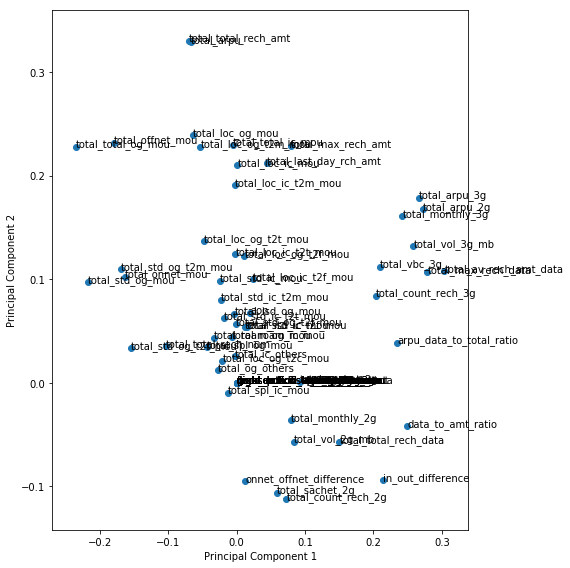

In [109]:
# Lets see the distibutions of columns in PCA in 2d space
pca.fit(X_train)
fig = plt.figure(figsize = (8,8))
plt.scatter(pca.components_[0],pca.components_[1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(X_train.columns):
    plt.annotate(txt, (pca.components_[0][i],pca.components_[1][i]))
plt.tight_layout()
plt.show()

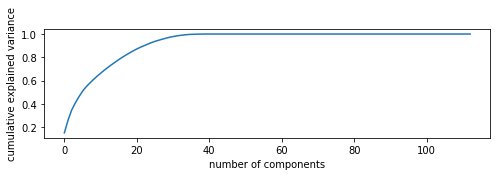

In [110]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,2))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [111]:
#Import incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [112]:
#Fit the train data
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(14667, 30)

In [113]:
#Fit the validation data
df_val_pca = pca_final.fit_transform(X_val)
df_val_pca.shape

(6287, 30)

In [114]:
#Fit the test data
df_test_pca = pca_final.fit_transform(X_test)
df_test_pca.shape

(8981, 30)

In [115]:
corrmat = np.corrcoef(df_train_pca.transpose())

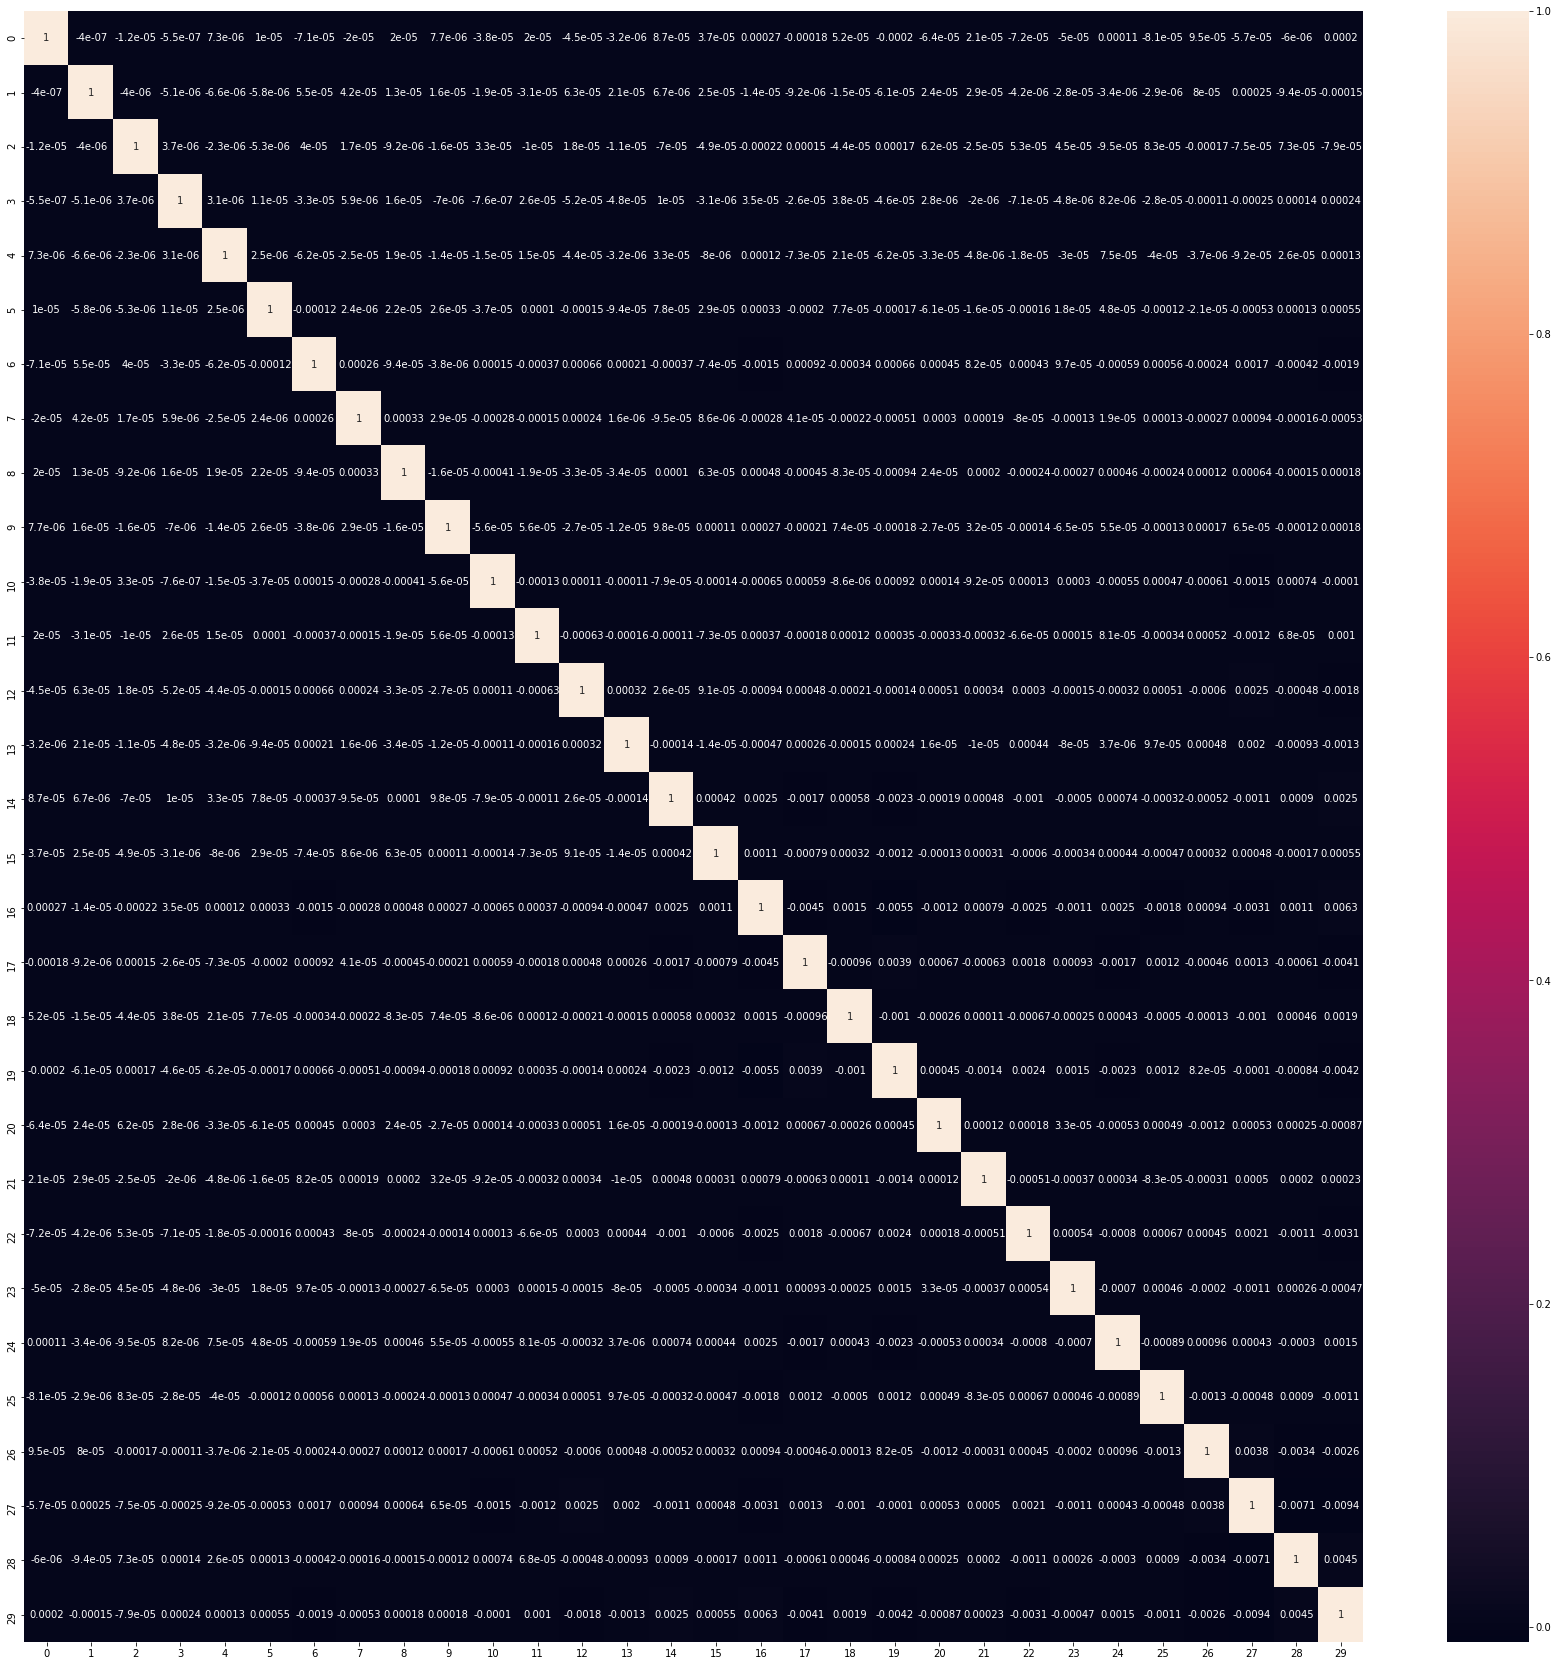

In [116]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,30))
sns.heatmap(corrmat,annot = True)

In [119]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0063026021106685716 , min corr:  -0.009355483083729651


In [120]:
#Applying selected components to the test data - 30 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8981, 30)

In [121]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [122]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.73'

This time, we'll let PCA select the number of components basen on a variance cutoff we provide.
Applying a logistic regression on our Principal Components - - We expect to get better model performance with significantly lower features.


In [123]:
pca_again = PCA(0.95)

In [124]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 28 components

(14667, 28)

In [125]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [126]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8981, 28)

In [127]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.77'

#### So there it is - a very similar result but a better one in this case, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.

In [128]:
import statsmodels.api as sm

In [129]:
y_train = list(y_train)

In [130]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                14667
Model:                            GLM   Df Residuals:                    14618
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3226.1
Date:                Mon, 20 May 2019   Deviance:                       6452.2
Time:                        10:25:20   Pearson chi2:                 2.59e+04
No. Iterations:                   100   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.2748      0.055    -59.755      0.000      -3.382      -3.167
night_pck_user_6              4.589e-07   1.22e-07      3.751      0.000    2.19e-07    6.99e-07
night_pck_user_7             -6.978e-08    2.5e-07     -0.279      0.780    -5.6e-07     4.2e-07
night_pck_user_8              2.094e-06    2.2e-07      9.508      0.000    1.66e-06    2.53e-06
fb_user_6                    -1.417e-06   1.62e-07     -8.753      0.000   -1.73e-06    -1.1e-06
fb_user_7                      -1.2e-06   1.95e-07     -6.148      0.000   -1.58e-06   -8.17e-07
fb_user_8                    -9.966e-07   1.23e-07     -8.109      0.000   -1.24e-06   -7.56e-07
rech_amt_6                   -3.549e-07   9.13e-08     -3.885      0.000   -5.34e-07   -1.76e-07
rech_amt_7                    1.193e-06   2.22e-07      5.379      0.000    7.58e-07    1.63e-06
rech_amt_8                    8.091e-09   1.33e-07      0.061      0.952   -2.53e-07    2.69e-07
rech_data_6                  -6.541e-07   2.71e-07     -2.415      0.016   -1.18e-06   -1.23e-07
rech_data_7                  -1.156e-06   2.45e-07     -4.716      0.000   -1.64e-06   -6.75e-07
rech_data_8                  -3.685e-08   1.01e-07     -0.365      0.715   -2.35e-07    1.61e-07
total_arpu                       0.6911      0.231      2.985      0.003       0.237       1.145
total_onnet_mou                 -5.3191      1.783     -2.984      0.003      -8.813      -1.826
total_offnet_mou                -5.1254      1.750     -2.928      0.003      -8.556      -1.695
total_roam_ic_mou                0.0882      0.035      2.553      0.011       0.020       0.156
total_roam_og_mou                1.0589      0.354      2.990      0.003       0.365       1.753
total_loc_og_t2t_mou          1.088e+04   2147.872      5.067      0.000    6674.584    1.51e+04
total_loc_og_t2m_mou          1.104e+04   2178.528      5.067      0.000    6769.365    1.53e+04
total_loc_og_t2f_mou           920.8085    181.736      5.067      0.000     564.613    1277.005
total_loc_og_t2c_mou            -0.0128      0.040     -0.319      0.750      -0.092       0.066
total_loc_og_mou              -317.5830   4411.136     -0.072      0.943   -8963.251    8328.085
total_std_og_t2t_mou          1.512e+04   4367.888      3.461      0.001    6555.871    2.37e+04
total_std_og_t2m_mou           1.51e+04   4362.435      3.461      0.001    6547.369    2.36e+04
total_std_og_t2f_mou           445.6651    128.782      3.461      0.001     193.257     698.073
total_std_og_mou              4461.1577   8139.855      0.548      0.584   -1.15e+04    2.04e+04
total_isd_og_mou               935.5249    160.801      5.818      0.000     620.360    1250.690
total_spl_og_mou               824.7156    141.763      5.818      0.000     546.865    1102.566
total_og_others                 68.9179     11.844      5.

In [133]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

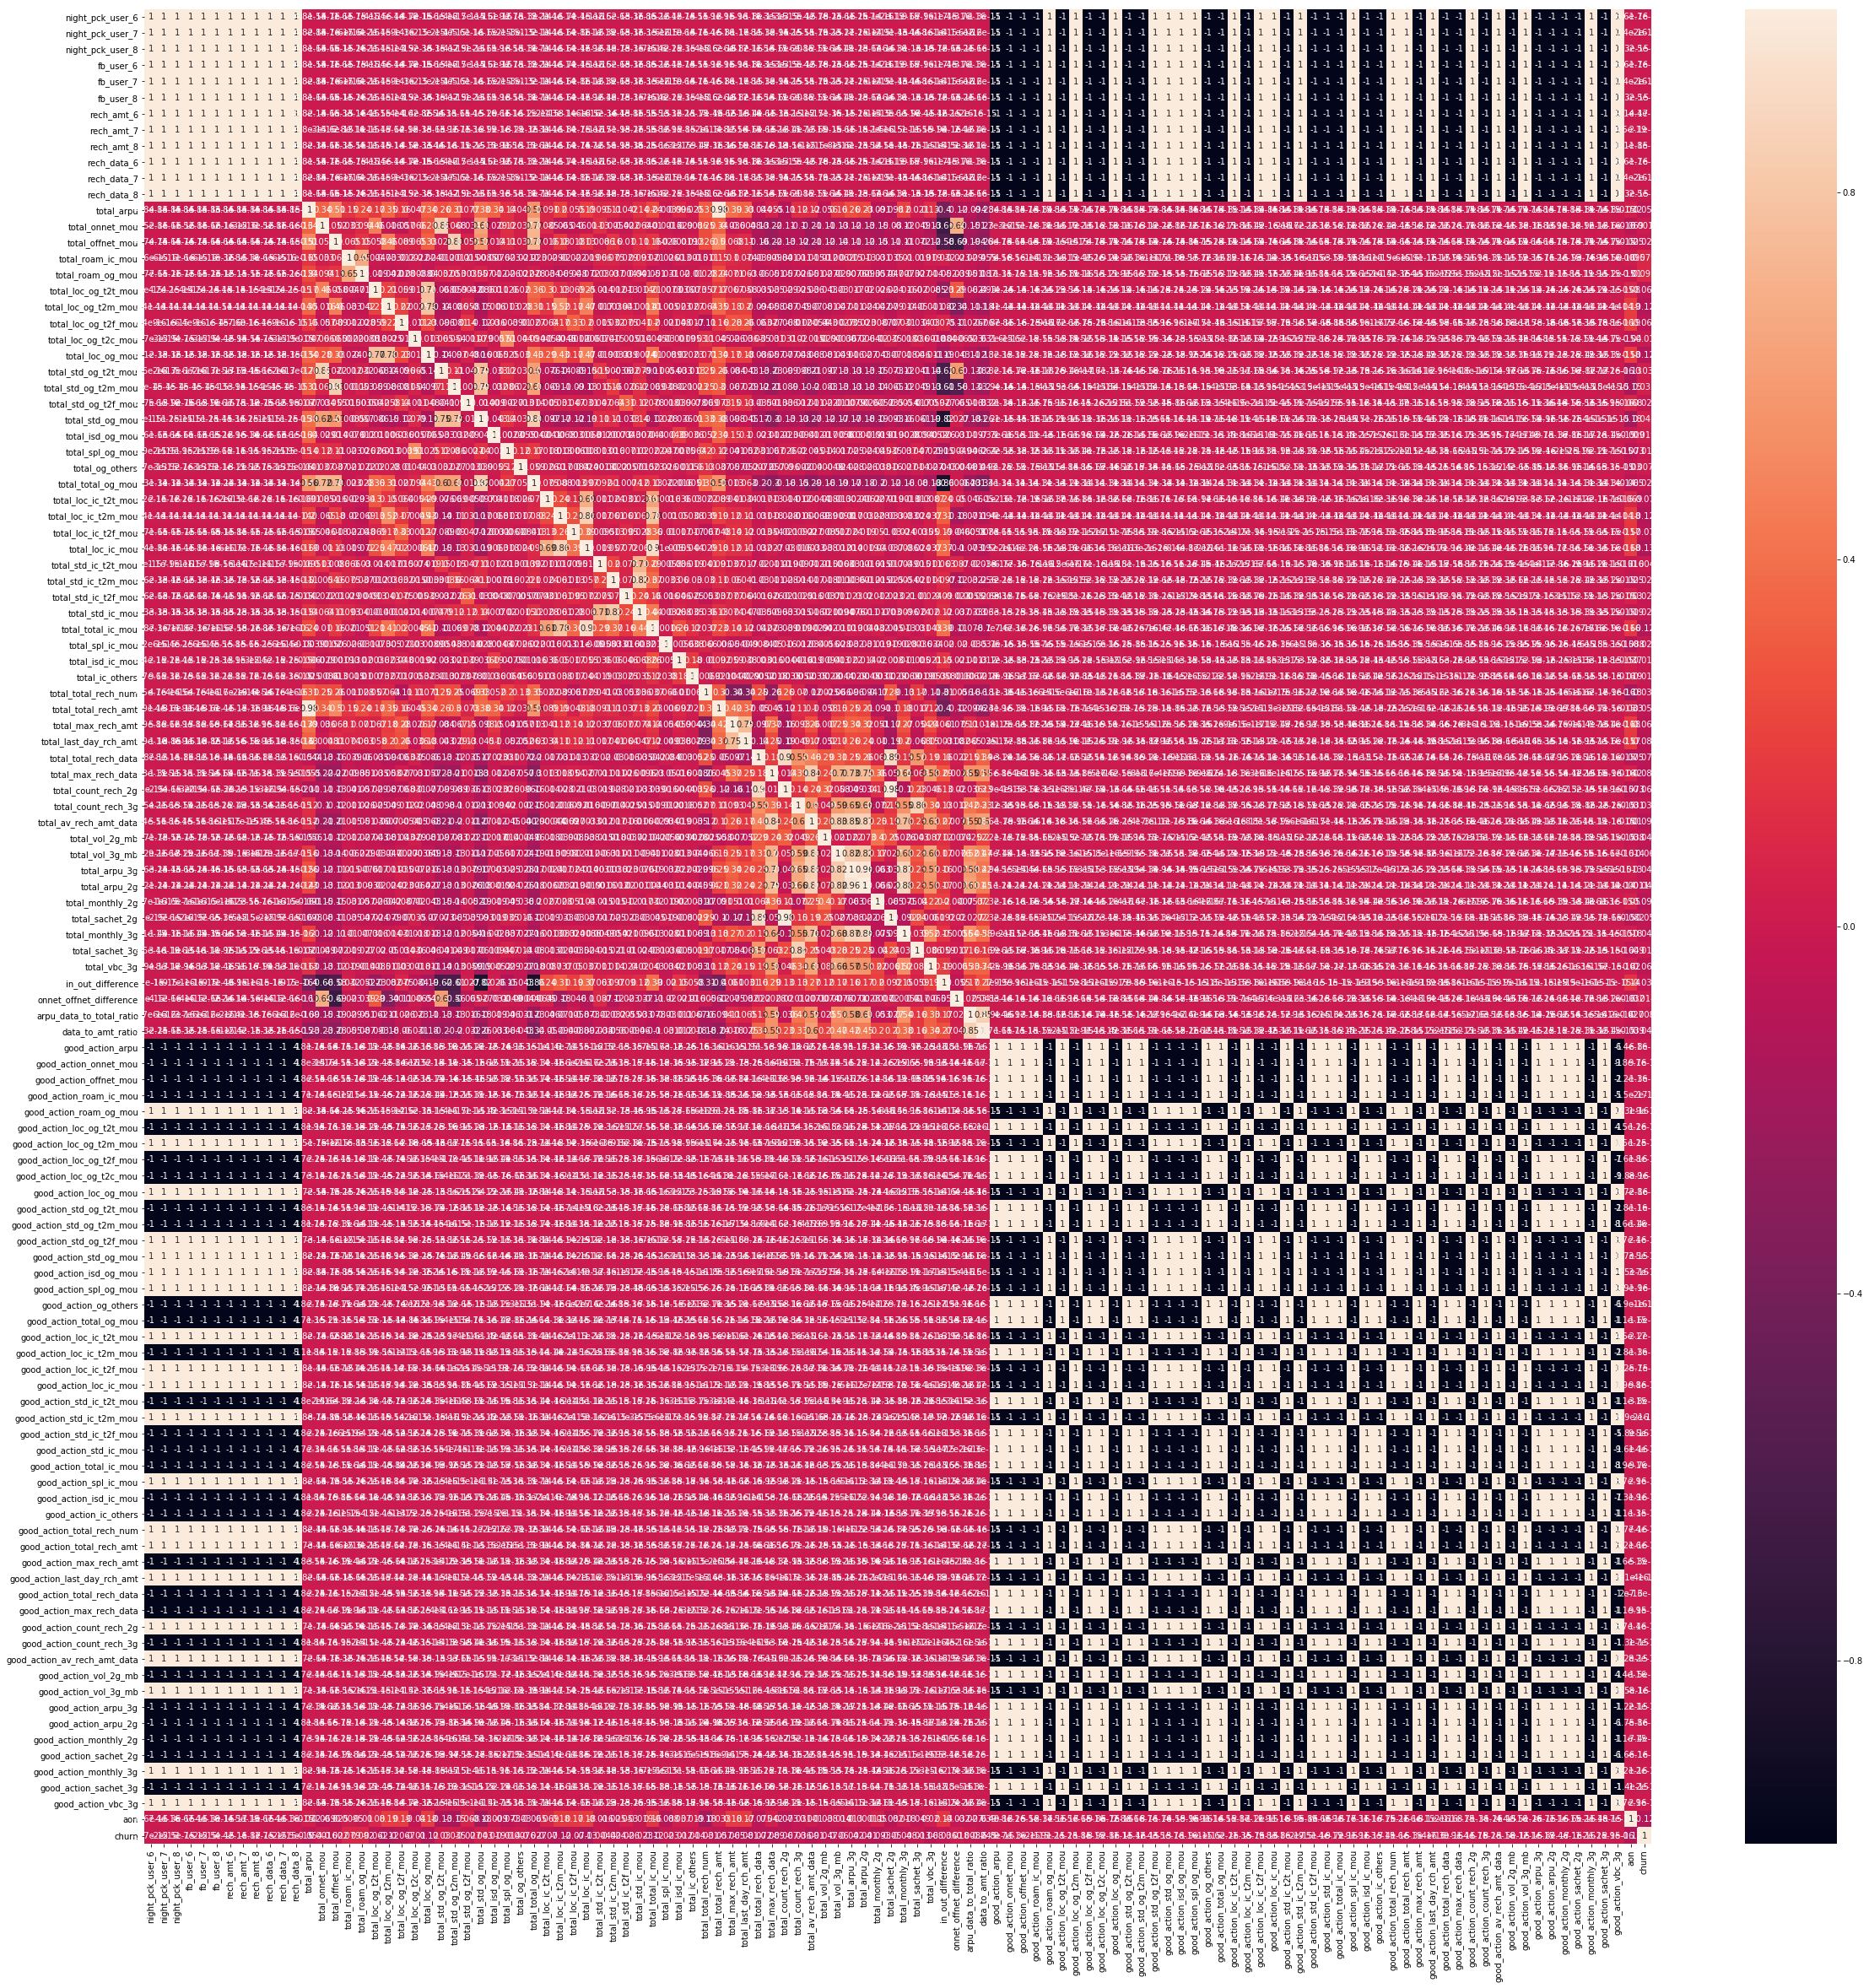

In [132]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(pca_data.corr(),annot = True)

### Feature Selection Using RFE

In [134]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,30)             # running RFE with 30 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False False False False False False
  True  True  True  True  True  True False  True False False  True  True
 False False  True False False False  True  True  True  True False  True
 False False False  True False False  True  True False  True  True  True
 False False  True False False  True  True  True False  True False  True
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True]
[84 83 82 81 80 79 78 77 76 75 74 73  1  1  1  1  1  1 13  1 20 22  1  1
  9  6  1 23 12 19  1  1  1  1 15  1  5 24 11  1 16 10  1  1  7  1  1  1
  2  3  1 18  4  1  1  1 21  1  8  1 14 17  1  1 26 32 33 36 37 27 28 40
 29 38 39 30 45 46 31 41 49 50 51 52 53 54 55 43 47 58 59 60 61 48 62 64
 63 44 67 68 69 70 

In [135]:
# Variables selected by RFE 
col = ['total_arpu',
'total_onnet_mou',
'total_offnet_mou',
'total_roam_ic_mou',
'total_roam_og_mou',
'total_loc_og_t2t_mou',
'total_loc_og_t2f_mou',
'total_std_og_t2t_mou',
'total_std_og_t2m_mou',
'total_isd_og_mou',
'total_loc_ic_t2t_mou',
'total_loc_ic_t2m_mou',
'total_loc_ic_t2f_mou',
'total_loc_ic_mou',
'total_std_ic_t2m_mou',
'total_spl_ic_mou',
'total_total_rech_num',
'total_total_rech_amt',
'total_last_day_rch_amt',
'total_total_rech_data',
'total_max_rech_data',
'total_av_rech_amt_data',
'total_arpu_3g',
'total_arpu_2g',
'total_monthly_2g',
'total_monthly_3g',
'total_vbc_3g',
'arpu_data_to_total_ratio',
'data_to_amt_ratio',
'aon'
]

In [136]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [137]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                14667
Model:                            GLM   Df Residuals:                    14618
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3226.1
Date:                Mon, 20 May 2019   Deviance:                       6452.2
Time:                        10:30:32   Pearson chi2:                 2.59e+04
No. Iterations:                   100   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.2748      0.055    -59.755      0.000      -3.382      -3.167
night_pck_user_6              4.589e-07   1.22e-07      3.751      0.000    2.19e-07    6.99e-07
night_pck_user_7             -6.978e-08    2.5e-07     -0.279      0.780    -5.6e-07     4.2e-07
night_pck_user_8              2.094e-06    2.2e-07      9.508      0.000    1.66e-06    2.53e-06
fb_user_6                    -1.417e-06   1.62e-07     -8.753      0.000   -1.73e-06    -1.1e-06
fb_user_7                      -1.2e-06   1.95e-07     -6.148      0.000   -1.58e-06   -8.17e-07
fb_user_8                    -9.966e-07   1.23e-07     -8.109      0.000   -1.24e-06   -7.56e-07
rech_amt_6                   -3.549e-07   9.13e-08     -3.885      0.000   -5.34e-07   -1.76e-07
rech_amt_7                    1.193e-06   2.22e-07      5.379      0.000    7.58e-07    1.63e-06
rech_amt_8                    8.091e-09   1.33e-07      0.061      0.952   -2.53e-07    2.69e-07
rech_data_6                  -6.541e-07   2.71e-07     -2.415      0.016   -1.18e-06   -1.23e-07
rech_data_7                  -1.156e-06   2.45e-07     -4.716      0.000   -1.64e-06   -6.75e-07
rech_data_8                  -3.685e-08   1.01e-07     -0.365      0.715   -2.35e-07    1.61e-07
total_arpu                       0.6911      0.231      2.985      0.003       0.237       1.145
total_onnet_mou                 -5.3191      1.783     -2.984      0.003      -8.813      -1.826
total_offnet_mou                -5.1254      1.750     -2.928      0.003      -8.556      -1.695
total_roam_ic_mou                0.0882      0.035      2.553      0.011       0.020       0.156
total_roam_og_mou                1.0589      0.354      2.990      0.003       0.365       1.753
total_loc_og_t2t_mou          1.088e+04   2147.872      5.067      0.000    6674.584    1.51e+04
total_loc_og_t2m_mou          1.104e+04   2178.528      5.067      0.000    6769.365    1.53e+04
total_loc_og_t2f_mou           920.8085    181.736      5.067      0.000     564.613    1277.005
total_loc_og_t2c_mou            -0.0128      0.040     -0.319      0.750      -0.092       0.066
total_loc_og_mou              -317.5830   4411.136     -0.072      0.943   -8963.251    8328.085
total_std_og_t2t_mou          1.512e+04   4367.888      3.461      0.001    6555.871    2.37e+04
total_std_og_t2m_mou           1.51e+04   4362.435      3.461      0.001    6547.369    2.36e+04
total_std_og_t2f_mou           445.6651    128.782      3.461      0.001     193.257     698.073
total_std_og_mou              4461.1577   8139.855      0.548      0.584   -1.15e+04    2.04e+04
total_isd_og_mou               935.5249    160.801      5.818      0.000     620.360    1250.690
total_spl_og_mou               824.7156    141.763      5.818      0.000     546.865    1102.566
total_og_others                 68.9179     11.844      5.

In [138]:
X_test[col].shape
#res = modres.predict(X_test[col])

(8981, 30)

In [139]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

1
0  0.108373
1  0.095946
2  0.040387
3  0.009971
4  0.022712

In [140]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
7916       1
61533      0
38177      0
17505      0
16959      0

In [141]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['churn','churn_prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

churn  churn_prob
0      1    0.108373
1      0    0.095946
2      0    0.040387
3      0    0.009971
4      0    0.022712

In [142]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

churn  churn_prob  predicted
0      1    0.108373          0
1      0    0.095946          0
2      0    0.040387          0
3      0    0.009971          0
4      0    0.022712          0

### Model Evaluation

In [143]:
from sklearn import metrics

In [144]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[8215,   16],
       [ 731,   19]])

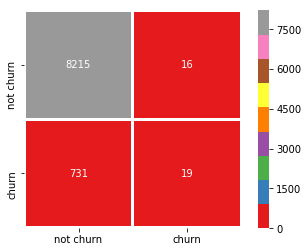

In [145]:
sns.heatmap(confusion,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")

In [146]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.9168244070816167

In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

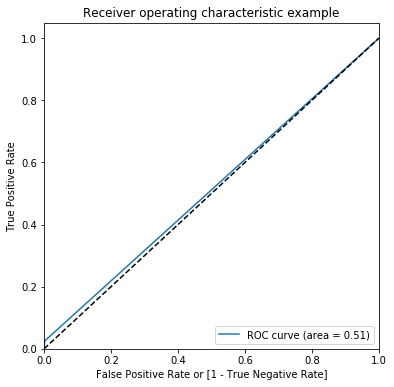

(array([0.        , 0.00194387, 1.        ]),
 array([0.        , 0.02533333, 1.        ]),
 array([2, 1, 0]))

In [148]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [149]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.churn_prob))

'0.78'

#### We see an overall AUC score of 0.78 looks like we did a decent job.


CONCLUSION

Below are the steps taken to analyse and deduce stratergies for Customer Churn: 

-Initially while analysing the data we had 226 variables overall.

-Data Preprocessing step has been performed where we have filled missing values (convert columns to appropriate formats, handle   missing values, etc.)

-We have filtered high value customers based on the sum of recharges in month 6 and 7.

-Identify churn based on the criteria that the usage of 'vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9'

-Remove the month 9 columns from all the variables since they are not necessary for prediction

-Correlation matrix of the new derived dataframe consisting of only month 6 ,7 and 8 columns for exploratory analysis.

-Outlier treatment of the variables defined in the new dataframe.

-Creating new features under another new dataframe where we indicate 1 if average first two months value(good months) is greater   than last month(action month).

-Merging of the two Dataframes having derived features.

-Reducing the number of variables using PCA to 30 with a variance of 95%.

-Applying a logistic regression on our Principal Components - - We expect to get better model performance with significantly       lower features.

-Model Evaluation via Logistic Regression to know the important features to determine the churn rate of high value customers.

We recommend that following 30 features to be considered in order to deduce churn:


'total_arpu',
'total_onnet_mou',
'total_offnet_mou',
'total_roam_ic_mou',
'total_roam_og_mou',
'total_loc_og_t2t_mou',
'total_loc_og_t2f_mou',
'total_std_og_t2t_mou',
'total_std_og_t2m_mou',
'total_isd_og_mou',
'total_loc_ic_t2t_mou',
'total_loc_ic_t2m_mou',
'total_loc_ic_t2f_mou',
'total_loc_ic_mou',
'total_std_ic_t2m_mou',
'total_spl_ic_mou',
'total_total_rech_num',
'total_total_rech_amt',
'total_last_day_rch_amt',
'total_total_rech_data',
'total_max_rech_data',
'total_av_rech_amt_data',
'total_arpu_3g',
'total_arpu_2g',
'total_monthly_2g',
'total_monthly_3g',
'total_vbc_3g',
'arpu_data_to_total_ratio',
'data_to_amt_ratio',
'aon'